In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import random
import scipy.stats as stats
sns.set()

In [16]:
randomlist = []
forecast_list = []
for i in range(0,21):
    n = random.randint(0,5)
    m = random.randint(1,5)
    randomlist.append(n)
    forecast_list.append(m)

In [17]:
rng = pd.date_range('2022-04-01', periods=21, freq='D')
df = pd.DataFrame({ 'Date': rng })
df['units_sold'] = randomlist

In [18]:
rng = pd.date_range('2022-04-22', periods=21, freq='D')
df_forecast = pd.DataFrame({ 'Date': rng }) 
df_forecast['units_sold'] = forecast_list

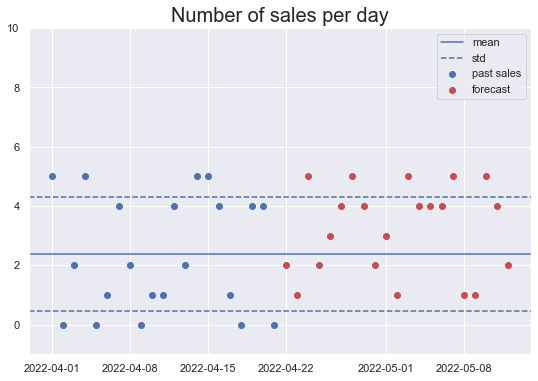

In [19]:
plt.figure(figsize=(9,6))
plt.ylim(-1,10)
plt.scatter(df.Date, df.units_sold, label='past sales')
plt.scatter(df_forecast.Date, df_forecast.units_sold, color='r', label='forecast')
plt.axhline(np.mean(randomlist), label='mean')
plt.axhline(np.mean(randomlist) + np.std(randomlist), linestyle='--', label='std')
plt.axhline(np.mean(randomlist) - np.std(randomlist), linestyle='--')
plt.title('Number of sales per day', fontsize=20)
plt.legend()
plt.show()

In [36]:
demand_mean = 2.2 #np.mean(randomlist) # units/day
demand_std = 1.5 # units
ordering_cost = 20 # euro/order
holding_cost = 0.6 # euro/day
lead_time = 7 # day
service_level = 0.95 #%

In [37]:
# Number of units ordered 
Q = np.sqrt(2*demand_mean*ordering_cost/holding_cost)
print(Q)

12.110601416389967


In [38]:
demand_mean_L = demand_mean * lead_time
demand_std_L = demand_std * np.sqrt(lead_time)

In [39]:
z = stats.norm.ppf(service_level, loc = 0, scale = 1)
SS = demand_std_L*z
ROP = demand_mean_L + SS

In [40]:
print(SS)
print(ROP)

6.527810460024307
21.92781046002431


In [41]:
demand = []
for i in range(0,30):
    n = random.randint(0,5)
    demand.append(n)

In [52]:
inventory = 30
lead_time = 7
demand_lead = 13
ROP = 20

q = 0
stock_out = 0
counter = 0
order_placed = False
# dictionary to store all the information
data = {'inv_level': [], 'daily_demand': [], 'orders': []}

for day in range(0, 30):
    day_demand = demand[day]
    data['daily_demand'].append(day_demand)

    if inventory < ROP :
        # Placing the order
        q = inventory + demand_lead
        order_placed = True
        data['orders'].append(q)

    if order_placed:
        counter += 1

    if counter == lead_time:
        # Restocking day
        inventory += q
        order_placed = False
        counter = 0

    if inventory - day_demand >= 0:
        inventory -= day_demand
    elif inventory - day_demand < 0:
        inventory = 0
        stock_out += 1

    data['inv_level'].append(inventory)

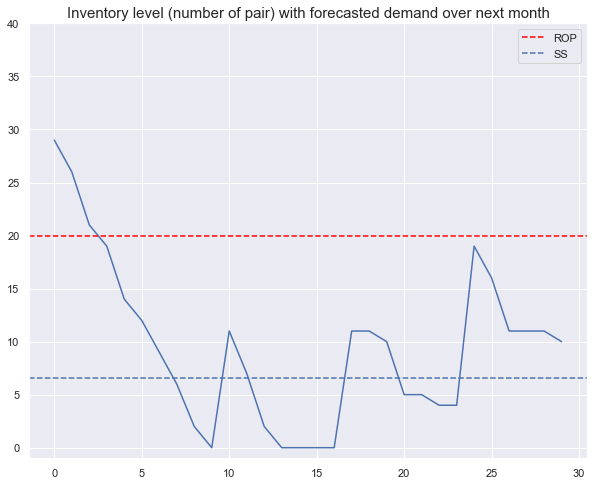

In [53]:
plt.figure(figsize=(10,8))
plt.ylim(-1,40)
plt.plot(data['inv_level'])
plt.axhline(ROP, linestyle='--', label='ROP', color = 'red')
plt.axhline(SS, linestyle='--', label='SS')
plt.title('Inventory level (number of pair) with forecasted demand over next month', fontsize=15)
plt.legend()
plt.show()